## Rank variables of interest in the Music-Coronavirus dataset
Lauren Fink  
lauren.fink@ae.mpg.de  
Final draft 1 version: 14.10.2020  

### Import libraries and dataset
NOTE: all functions to calculate rankings and plot them are defined in `local_funcs`

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import pingouin as pg

# Local imports
import local_dicts #dictionary defining column labels for our dataframe and answer text~answer code relationships 
import local_funcs # functions that we might want to use in multiple scripts throughout the project

# TODO delete once done debugging
import importlib
importlib.reload(local_dicts) #dictionary defining column labels for our dataframe and answer text~answer code relationships 
importlib.reload(local_funcs)

# visualization tools
import matplotlib.pyplot as plt
import qgrid 
import seaborn as sns, IPython.display
from IPython.display import Image, HTML
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4);
plt.rcParams['pdf.fonttype'] = 42 
plt.tight_layout()
sns.set_context("talk")
color_defs = ["#000000", "#009e73", "#d55e00", "#cc79a7", "#56b3e9", "#e69d00"] # colorblind friendly
sns.set_palette(color_defs)
sns.set_style("whitegrid")
from plotnine import * 

# Load data
data = pd.read_csv('cleaned_data.csv')

# Need to rename a few columns because covid status starts with the same demo health keyword. want those separated here. 
data.rename(columns={#'Demographics_Health_General Health': 'nDemographics_Health_General Health',
                    'Demographics_Health_Positive Valence':'nDemographics_Health_Positive Emotions',
                    'Demographics_Health_Negative Valence':'nDemographics_Health_Negative Emotions',
                    'Demographics_Health_Stressed':'nDemographics_Health_Stressed',
                    'Demographics_Health_Lonely':'nDemographics_Health_Lonely',
                    'Demographics_Health_Anxious':'nDemographics_Health_Anxious',
                    'Demographics_Health_Arousal':'nDemographics_Health_Energetic',
                    'Demographics_Health_Depressed':'nDemographics_Health_Depressed',
                    #'Demographics_Health_Bored':'nDemographics_Health_Bored' # NOTE: will get nan for ranks if keep bored in because not all countries saw
                    }, inplace=True)

<Figure size 1008x288 with 0 Axes>

## Activities
Rank all domestic leisure activities by order of increased importance during lockdown. 

(4206, 29)
percent no change: 0.5149458081230426
Some means < 0

 Germany
(750, 29)
percent no change: 0.704183908045977
Some means < 0

 France
(671, 29)
percent no change: 0.6363122462613701
Some means < 0

 Italy
(741, 29)
percent no change: 0.558983666061706
Some means < 0

 India
(744, 29)
percent no change: 0.2407304412309974
Some means < 0

 USA
(749, 29)
percent no change: 0.4797200865521845
Some means < 0

 UK
(551, 29)
percent no change: 0.4684898929845422
Some means < 0


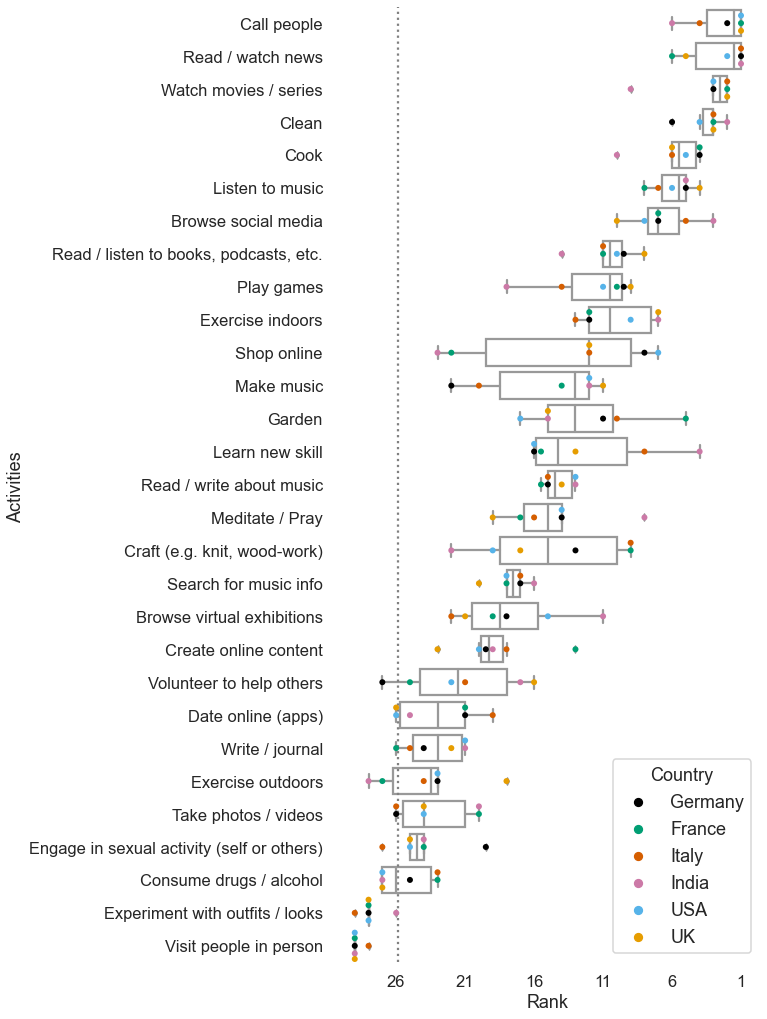

In [4]:
keyword = 'Activities_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)


Mean corr coef: 0.8491204066035325 

        Germany France  Italy  India    USA     UK
Germany       -  0.000  0.000  0.000  0.000  0.000
France    0.877      -  0.000  0.000  0.000  0.000
Italy     0.932  0.904      -  0.000  0.000  0.000
India     0.727  0.758  0.783      -  0.000  0.000
USA       0.925  0.828  0.875  0.821      -  0.000
UK        0.873  0.829  0.873  0.783  0.948      -


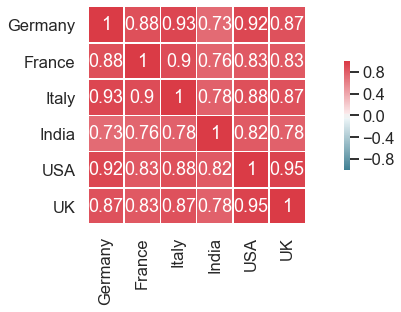

In [5]:
local_funcs.print_rank_corr(all_ranks_change)

Check if there is any difference in activity importance among the subsample of people who report making music. 
Answer: not really. Listening to music moves up by on rank. Read / write about music also moves up (even above making). 

In [6]:
# # plot activities for only music making people
# NOTE: running this will re-write previous activities plot. Be sure to rename file 

# data['Survey Info_Group'] = np.where( (data['Music Listening_Functions_Helps Me Relax'].notnull())  
#                                      & (data['Making Music_Functions_Helps Me Relax'].notnull()), 
#                                      4,  data['Survey Info_Group'])
# nd = data[data['Survey Info_Group'] == 4]
# keyword = 'Activities_'
# [all_ranks_change, chgrank] = local_funcs.return_ranks(nd, keyword)
# [f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)

## Functions of Music Listening / Making 
Rank reasons that become more important to people for choosing to listen to or make music. 

### Music Listening

(4146, 37)
percent no change: 0.4871122931904408

 Germany
(723, 37)
percent no change: 0.6872266457328698

 France
(740, 37)
percent no change: 0.6334550766983199
Some means < 0

 Italy
(726, 37)
percent no change: 0.4705904251358797

 India
(700, 37)
percent no change: 0.20424710424710424

 USA
(716, 37)
percent no change: 0.4573456137701948

 UK
(541, 37)
percent no change: 0.4470699905080681
Some means < 0
99


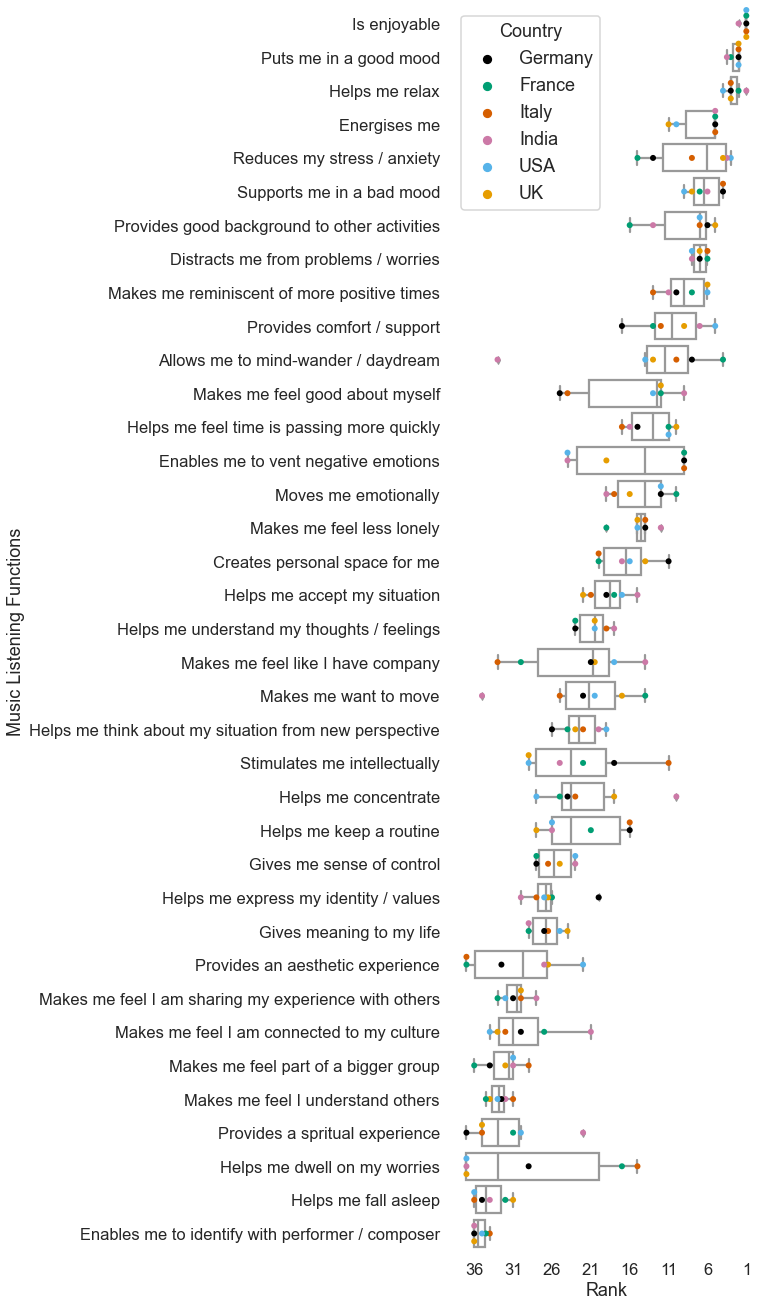

In [7]:
keyword = 'Music Listening_Functions_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
print(chgrank)


Mean corr coef: 0.807584499664033 

        Germany France  Italy  India    USA     UK
Germany       -  0.000  0.000  0.000  0.000  0.000
France    0.892      -  0.000  0.000  0.000  0.000
Italy     0.911   0.89      -  0.000  0.000  0.000
India     0.687  0.625  0.647      -  0.000  0.000
USA       0.834  0.792  0.749  0.828      -  0.000
UK        0.869  0.826  0.781  0.819  0.962      -


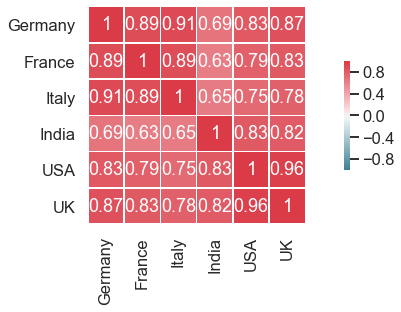

In [8]:
local_funcs.print_rank_corr(all_ranks_change)

### Music Making

(2688, 37)
percent no change: 0.44460867117117114

 Germany
(280, 37)
percent no change: 0.6175675675675676

 France
(354, 37)
percent no change: 0.5887158344785464

 Italy
(340, 37)
percent no change: 0.41033386327503973

 India
(639, 37)
percent no change: 0.21245188850822655

 USA
(616, 37)
percent no change: 0.4871007371007371

 UK
(459, 37)
percent no change: 0.5195195195195195
Some means < 0


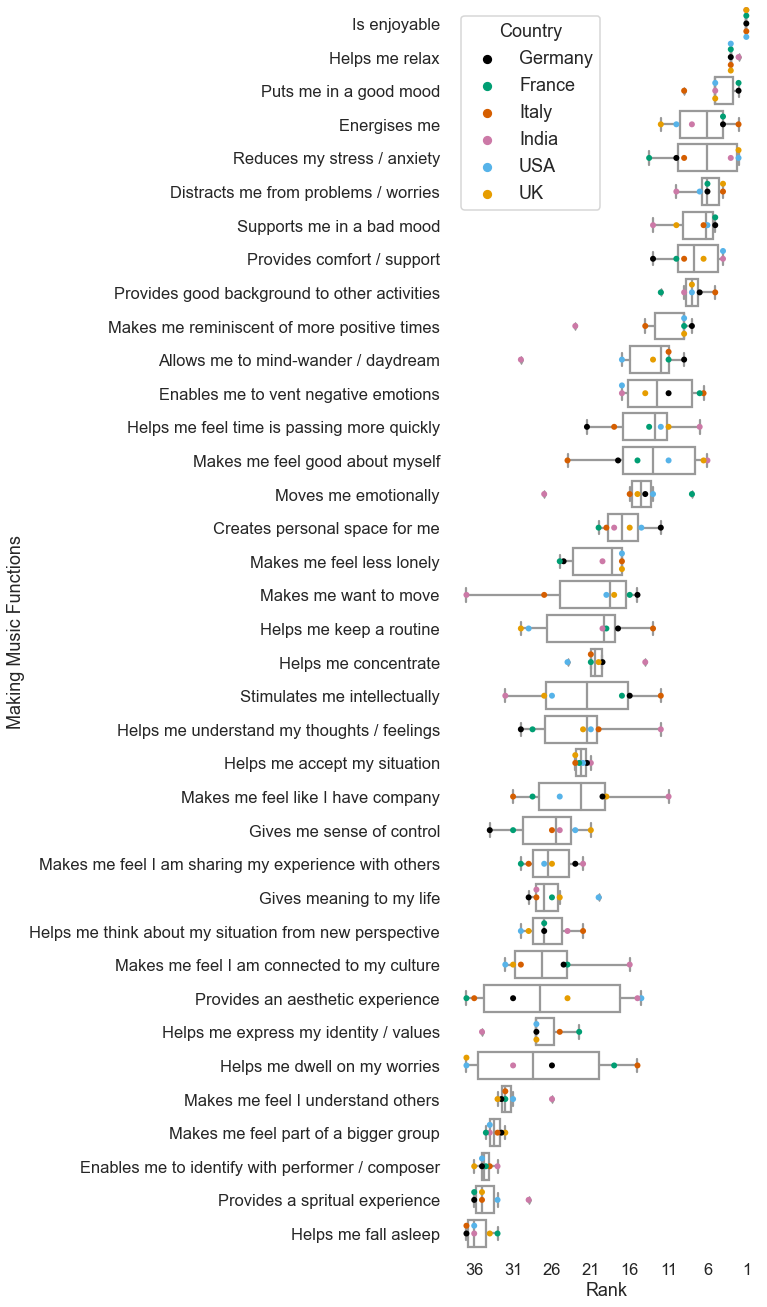

In [9]:
keyword = 'Making Music_Functions_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)


Mean corr coef: 0.7784029377585908 

        Germany France  Italy  India    USA     UK
Germany       -  0.000  0.000  0.000  0.000  0.000
France    0.935      -  0.000  0.000  0.000  0.000
Italy     0.877  0.908      -  0.000  0.000  0.000
India     0.611  0.548  0.583      -  0.000  0.000
USA       0.815  0.778  0.733  0.758      -  0.000
UK        0.844  0.807  0.747  0.764  0.966      -


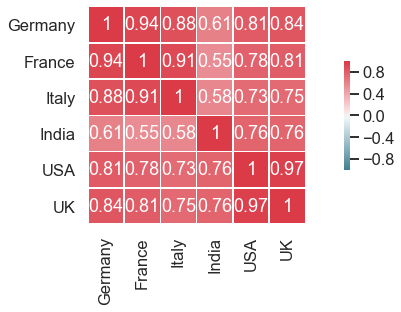

In [10]:
local_funcs.print_rank_corr(all_ranks_change)

## Formats
Rank formats of music listening that became more important during lockdown.
NOTE: This question was not displayed in German version of survey (hence nan values below). 

(3877, 12)
percent no change: 0.5922104720144442

 Germany
(0, 12)
percent no change: nan

 France
(858, 12)
percent no change: 0.7536907536907537
Some means < 0

 Italy
(804, 12)
percent no change: 0.6429311774461028
Some means < 0

 India
(813, 12)
percent no change: 0.3169331693316933

 USA
(793, 12)
percent no change: 0.5961538461538461

 UK
(609, 12)
percent no change: 0.6600985221674877
Some means < 0


/Users/lauren.fink/Documents/Projects/CMQ_new/Music-Coronavirus/local_funcs.py:409: RuntimeWarning: invalid value encountered in long_scalars
  print('percent no change:', mld.isin([0]).sum().sum() / (mld.shape[0]*mld.shape[1]))


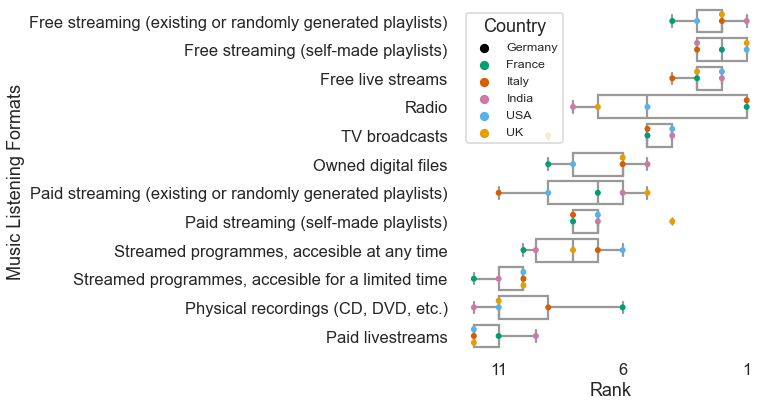

In [11]:
keyword = 'Music Listening_Formats_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)


Mean corr coef: 0.721475457439268 

        Germany France  Italy  India    USA     UK
Germany       -    nan    nan    nan    nan    nan
France      nan      -  0.004  0.048  0.009  0.048
Italy       nan  0.811      -  0.038  0.003  0.048
India       nan  0.585  0.634      -  0.004  0.004
USA         nan  0.748   0.86  0.806      -  0.006
UK          nan   0.58  0.601  0.813  0.776      -


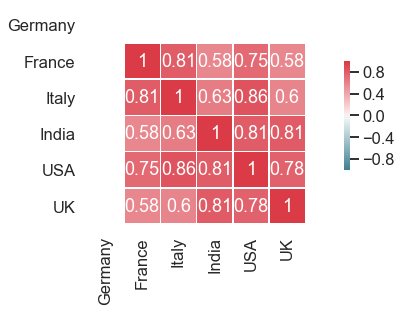

In [12]:
local_funcs.print_rank_corr(all_ranks_change)

## Situations
Rank situations that became more important for music listening and making. 

### Music Listening

(4665, 12)
percent no change: 0.5809038942479456

 Germany
(795, 12)
percent no change: 0.7672955974842768
Some means < 0

 France
(858, 12)
percent no change: 0.7101787101787101
Some means < 0

 Italy
(803, 12)
percent no change: 0.6012868410128684
Some means < 0

 India
(808, 12)
percent no change: 0.2835189768976898

 USA
(792, 12)
percent no change: 0.5462962962962963

 UK
(609, 12)
percent no change: 0.5681444991789819
Some means < 0
99


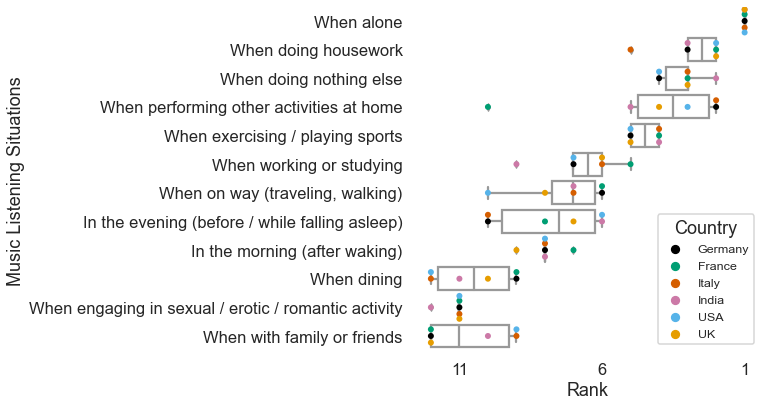

In [13]:
keyword = 'Music Listening_Situations_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
print(chgrank)


Mean corr coef: 0.8354312354312353 

        Germany France  Italy  India    USA     UK
Germany       -  0.008  0.000  0.001  0.002  0.000
France    0.734      -  0.020  0.002  0.018  0.001
Italy     0.909  0.657      -  0.001  0.001  0.001
India     0.846  0.797  0.853      -  0.000  0.000
USA       0.818  0.671  0.867  0.909      -  0.000
UK        0.923  0.832  0.867  0.923  0.923      -


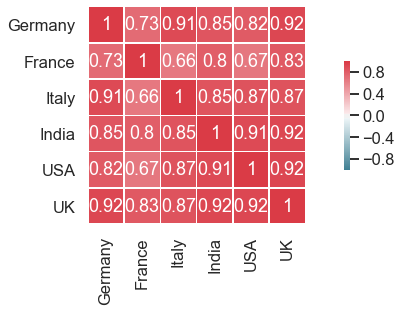

In [14]:
local_funcs.print_rank_corr(all_ranks_change)

### Making music

(3030, 13)
percent no change: 0.617974105102818

 Germany
(325, 13)
percent no change: 0.7834319526627219
Some means < 0

 France
(397, 13)
percent no change: 0.7614803332687463
Some means < 0

 Italy
(368, 13)
percent no change: 0.6565635451505016
Some means < 0

 India
(757, 13)
percent no change: 0.31815872370694037

 USA
(668, 13)
percent no change: 0.6564947029018885

 UK
(515, 13)
percent no change: 0.7660941000746826
Some means < 0
99


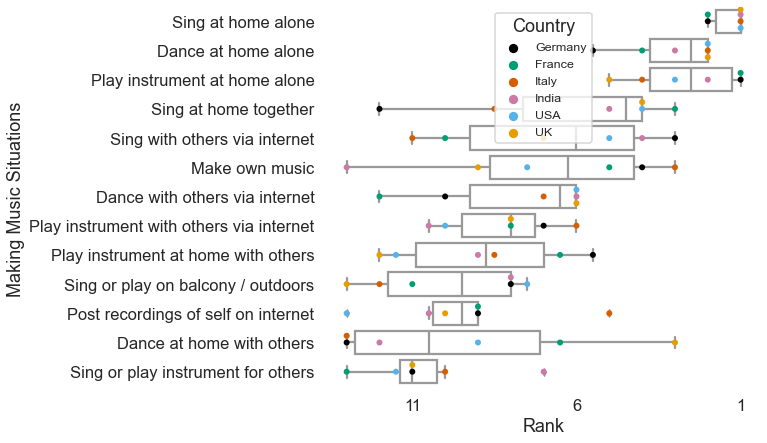

In [15]:
keyword = 'Making Music_Situations_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
print(chgrank)


Mean corr coef: 0.4997822536721164 

        Germany France  Italy  India    USA     UK
Germany       -  0.182  0.092  0.182  0.182  0.694
France    0.464      -  0.092  0.265  0.092  0.092
Italy     0.583  0.585      -  0.294  0.192  0.217
India     0.452  0.358  0.328      -  0.020  0.143
USA       0.473  0.606  0.432  0.789      -  0.023
UK        0.121   0.63  0.402  0.523  0.752      -


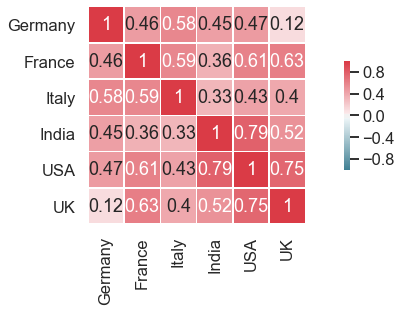

In [16]:
local_funcs.print_rank_corr(all_ranks_change)

## Self-reported well-being
Rank change in self-reported well being measures

(4819, 7)
percent no change: 0.3632348145732665
Some means < 0

 Germany
(832, 7)
percent no change: 0.49776785714285715
Some means < 0

 France
(910, 7)
percent no change: 0.4521193092621664
Some means < 0

 Italy
(874, 7)
percent no change: 0.38002615233736514
Some means < 0

 India
(786, 7)
percent no change: 0.1846601235914213

 USA
(813, 7)
percent no change: 0.3544192584782991
Some means < 0

 UK
(604, 7)
percent no change: 0.2639545884578997
Some means < 0


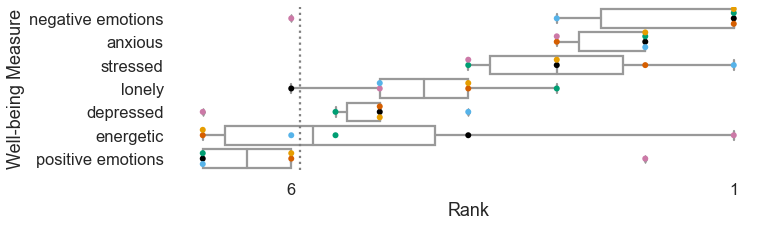

In [17]:
# Do ranks for felt emotions
keyword = 'nDemographics_Health_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
ax.set(ylabel='Well-being Measure', title='');
ax.get_legend().remove()
f.savefig('Figures/emotions_ranked.png', dpi=300);


Mean corr coef: 0.39569600429465596 

        Germany  France   Italy   India    USA     UK
Germany       -   0.098   0.119   0.702  0.098  0.098
France    0.775       -   0.088   0.411  0.172  0.042
Italy     0.714   0.829       -   0.293  0.088  0.007
India    -0.179  -0.396  -0.536       -  0.411  0.316
USA        0.75   0.649   0.821  -0.393      -  0.098
UK         0.75   0.901   0.964    -0.5  0.786      -


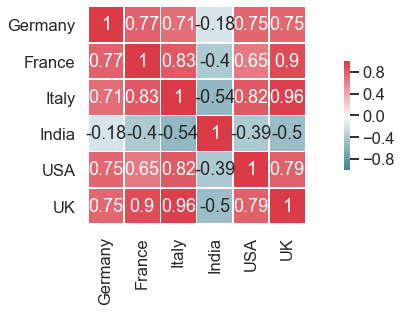

In [18]:
local_funcs.print_rank_corr(all_ranks_change)

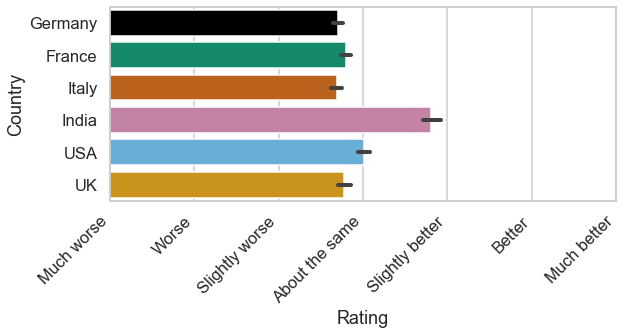

In [19]:
# look at overall general health question 
f = plt.figure(figsize=(9,5))
cols = ['Country_Country Name', 'Demographics_Health_General Health']
mld = data[cols]
mld = mld.replace({99:np.nan})
mld = mld.dropna()
mld = mld.reset_index(drop = True) 
df2 = pd.melt(mld, id_vars="Country_Country Name", var_name="hypoth", value_name="rating")

ax = sns.barplot(x='rating', y='Country_Country Name', data=df2)

ax.set(xlabel='Rating', ylabel='Country',title='');
ax.set(xlim=(1,7))
xlabs = list(local_dicts.answer_code_dict['Demographics_Health_General Health'].values())
ax.set(xticklabels=xlabs);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

f.tight_layout()
f.savefig('Figures/generalHealth.png', dpi=300);

## Coping scores
Rank the three dependent variables of interest by mean agreement

### Music Listening

(4626, 3)
percent no change: 0.28051592448479606

 Germany
(792, 3)
percent no change: 0.28703703703703703
Some means < 0

 France
(848, 3)
percent no change: 0.4386792452830189
Some means < 0

 Italy
(800, 3)
percent no change: 0.3229166666666667
Some means < 0

 India
(794, 3)
percent no change: 0.12846347607052896

 USA
(788, 3)
percent no change: 0.2787648054145516

 UK
(604, 3)
percent no change: 0.19591611479028698
                             Germany  France  Italy  India  USA   UK
feel connected to others         2.0     2.0    2.0    2.0  2.0  2.0
helps me cope                    1.0     3.0    1.0    1.0  1.0  1.0
serve as social interaction      3.0     1.0    3.0    3.0  3.0  3.0


/Users/lauren.fink/Documents/Projects/CMQ_new/Music-Coronavirus/local_funcs.py:545: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  f.tight_layout()


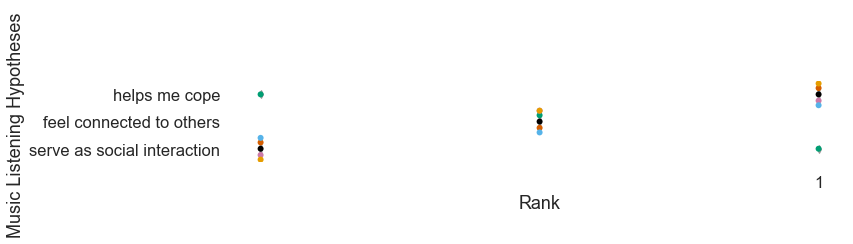

In [20]:
keyword = 'Music Listening_Hypotheses_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
print(all_ranks_change)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
ax.get_legend().remove()
# f.tight_layout()
# f.savefig('Figures/Hypotheses_ranks_listening.png', dpi=300);

### Music Making

(3023, 3)
percent no change: 0.27544381960524866

 Germany
(324, 3)
percent no change: 0.25617283950617287
Some means < 0

 France
(397, 3)
percent no change: 0.4995801847187238
Some means < 0

 Italy
(367, 3)
percent no change: 0.2997275204359673
Some means < 0

 India
(754, 3)
percent no change: 0.12643678160919541

 USA
(668, 3)
percent no change: 0.31037924151696605

 UK
(513, 3)
percent no change: 0.27030539311241064
Some means < 0


/Users/lauren.fink/Documents/Projects/CMQ_new/Music-Coronavirus/local_funcs.py:545: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  f.tight_layout()


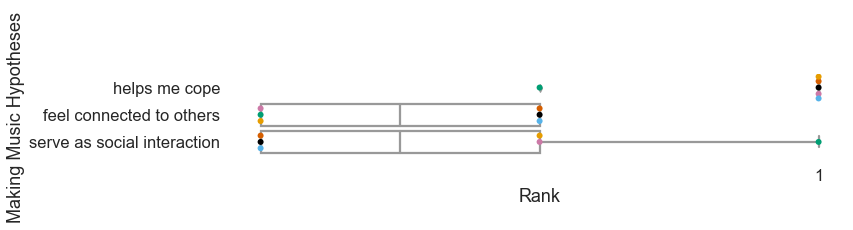

In [21]:
keyword = 'Making Music_Hypotheses_'
[all_ranks_change, chgrank] = local_funcs.return_ranks(data, keyword)
[f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)
ax.get_legend().remove()
#f.tight_layout()
#f.savefig('Figures/Hypotheses_ranks_playing.png', dpi=300);

## Explore coping scores further
Since we want these scores as DVs in our statistical models, we should check their correlation (to see if it makes sense to build three separate models) and there distribution (to ensure we have a somewhat normal distribution to predict. 

### Music Listening

All countries



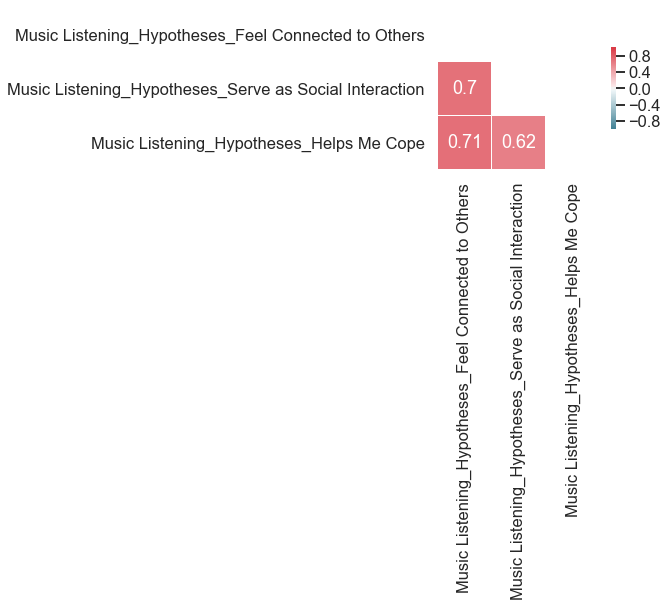

In [22]:
# Look at correlations between coping scores
f, ax = plt.subplots(figsize=(4, 3))
cols = ['Music Listening_Hypotheses_Feel Connected to Others', 
        'Music Listening_Hypotheses_Serve as Social Interaction', 
        'Music Listening_Hypotheses_Helps Me Cope'
       ]
df = data[cols]
df = df.replace({99:np.nan})
print('All countries\n')
local_funcs.corr_mat_plot(df)

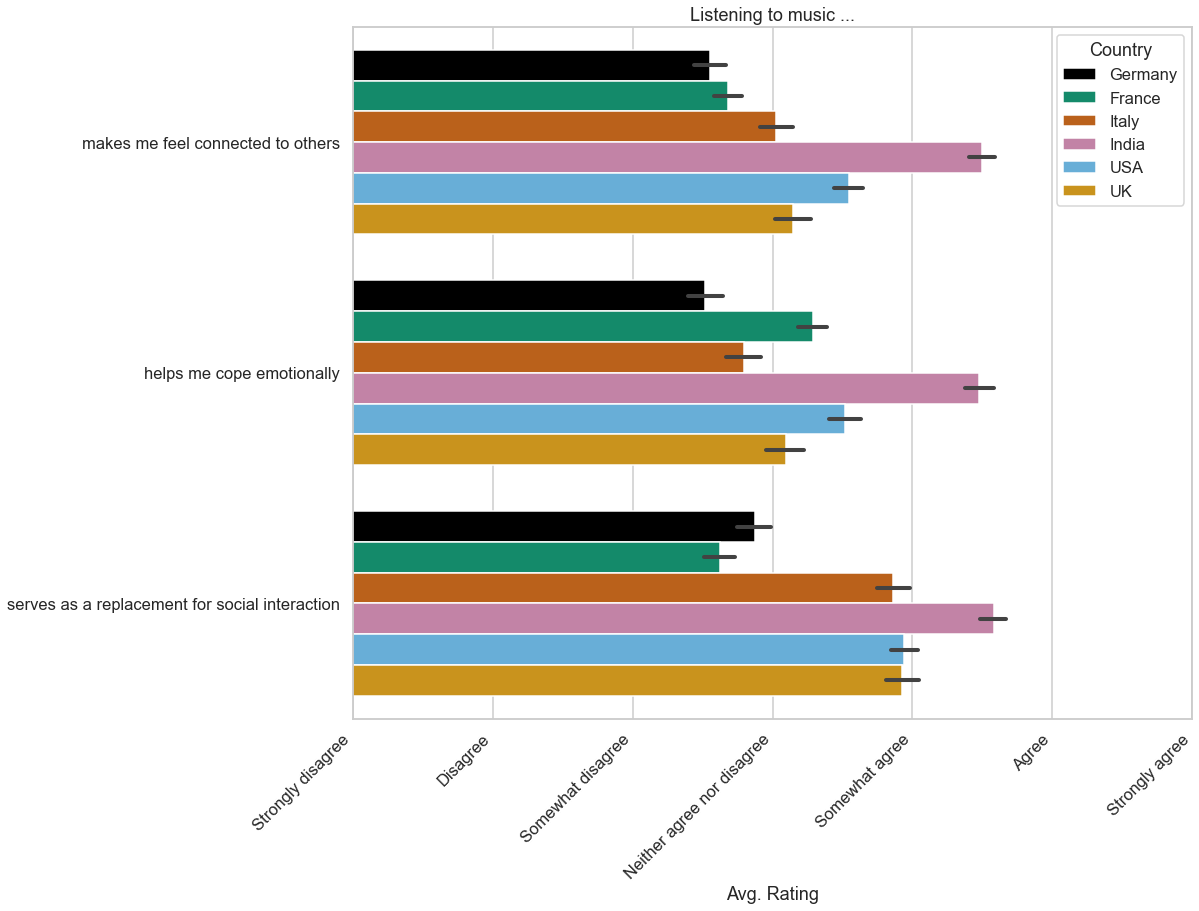

In [23]:
# plot hypothesis means by country - listening
f = plt.figure(figsize=(17,13))

cols = ['Country_Country Name', 'Music Listening_Hypotheses_Feel Connected to Others', 'Music Listening_Hypotheses_Serve as Social Interaction', 'Music Listening_Hypotheses_Helps Me Cope']
mld = data[cols]
mld = mld.dropna()
mld = mld.reset_index(drop = True) 
df2 = pd.melt(mld, id_vars='Country_Country Name', var_name="hypoth", value_name="rating")

ax = sns.barplot(x='rating', y='hypoth', hue='Country_Country Name', data=df2)

ax.set(xlabel='Avg. Rating', ylabel='',title='Listening to music ...');
ax.set(xlim=(1,7))
xlabs = list(local_dicts.hypotheses_scale.values())
ax.set(xticklabels=xlabs);
ylabs = ['makes me feel connected to others', 'helps me cope emotionally', 'serves as a replacement for social interaction']
ax.set(yticklabels=ylabs);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.legend(loc='best')

leg = ax.get_legend()
leg.set_title("Country")

f.tight_layout()
f.savefig('Figures/Hypotheses_X_country_meansListening.png', dpi=300);


0.5531776913099871
2559
4626


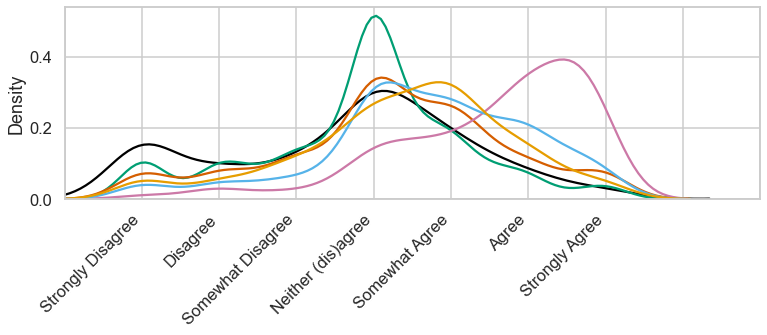

In [24]:
# do with multiple histograms instead?
cols = ['Country_Country Name','Music Listening_Hypotheses_Feel Connected to Others', 'Music Listening_Hypotheses_Serve as Social Interaction', 'Music Listening_Hypotheses_Helps Me Cope']
df = data[cols]
df = df.replace({99:np.nan})
df['comb_hyp_list'] = (df['Music Listening_Hypotheses_Feel Connected to Others'] + df['Music Listening_Hypotheses_Serve as Social Interaction'] + df['Music Listening_Hypotheses_Helps Me Cope']) / 3


# Sort the dataframe by target
ger = df.loc[df['Country_Country Name'] == 'Germany']
ger = ger.dropna()
fra = df.loc[df['Country_Country Name'] == 'France']
fra = fra.dropna()
ita = df.loc[df['Country_Country Name'] == 'Italy']
ita = ita.dropna()
ind = df.loc[df['Country_Country Name'] == 'India']
ind = ind.dropna()
usa = df.loc[df['Country_Country Name'] == 'USA']
usa = usa.dropna()
uk = df.loc[df['Country_Country Name'] == 'UK']
uk = uk.dropna()

f, ax = plt.subplots(figsize=(11, 5))

sns.distplot(ger[['comb_hyp_list']], hist=False, rug=False)
sns.distplot(fra[['comb_hyp_list']], hist=False, rug=False)
sns.distplot(ita[['comb_hyp_list']], hist=False, rug=False)
sns.distplot(ind[['comb_hyp_list']], hist=False, rug=False)
sns.distplot(usa[['comb_hyp_list']], hist=False, rug=False)
ax = sns.distplot(uk[['comb_hyp_list']], hist=False, rug=False)

ax.set(ylabel='Density');
ax.set(xlim=(0,9))
xlabs = ['', 'Strongly Disagree', 'Disagree', 'Somewhat Disagree', 'Neither (dis)agree', 'Somewhat Agree', 'Agree', 'Strongly Agree', '']
ax.set(xticklabels=xlabs);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
#ax.grid(False)
f.tight_layout()
f.savefig('Figures/Hypotheses_X_country_means_combinedScore_listning_KDE.png', dpi=300);

frames = [ger, fra, ita, ind, usa, uk]
nd = pd.concat(frames)
high_list = nd[nd['comb_hyp_list'] > 4]
print(high_list.shape[0] / nd.shape[0])

print(high_list.shape[0])
print(nd.shape[0])

### Music Making

All countries



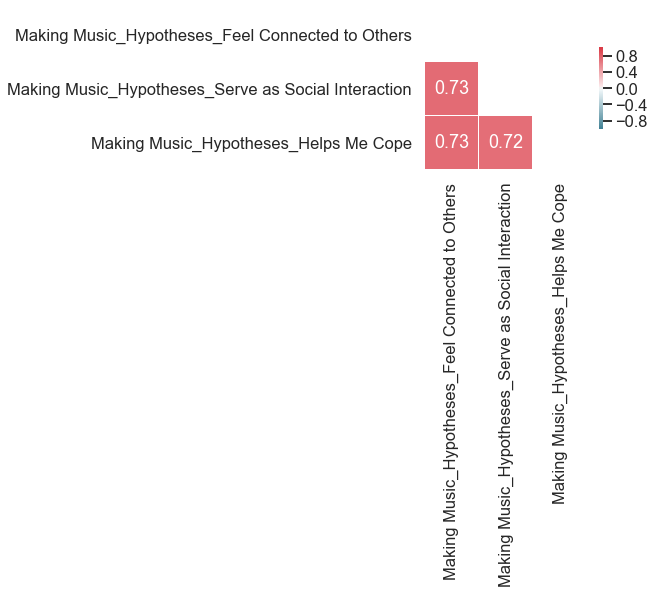

In [25]:
### Music Making
f, ax = plt.subplots(figsize=(4, 3))
cols = ['Making Music_Hypotheses_Feel Connected to Others', 
        'Making Music_Hypotheses_Serve as Social Interaction', 
        'Making Music_Hypotheses_Helps Me Cope'
       ]
df = data[cols]
df = df.replace({99:np.nan})
print('All countries\n')
local_funcs.corr_mat_plot(df)

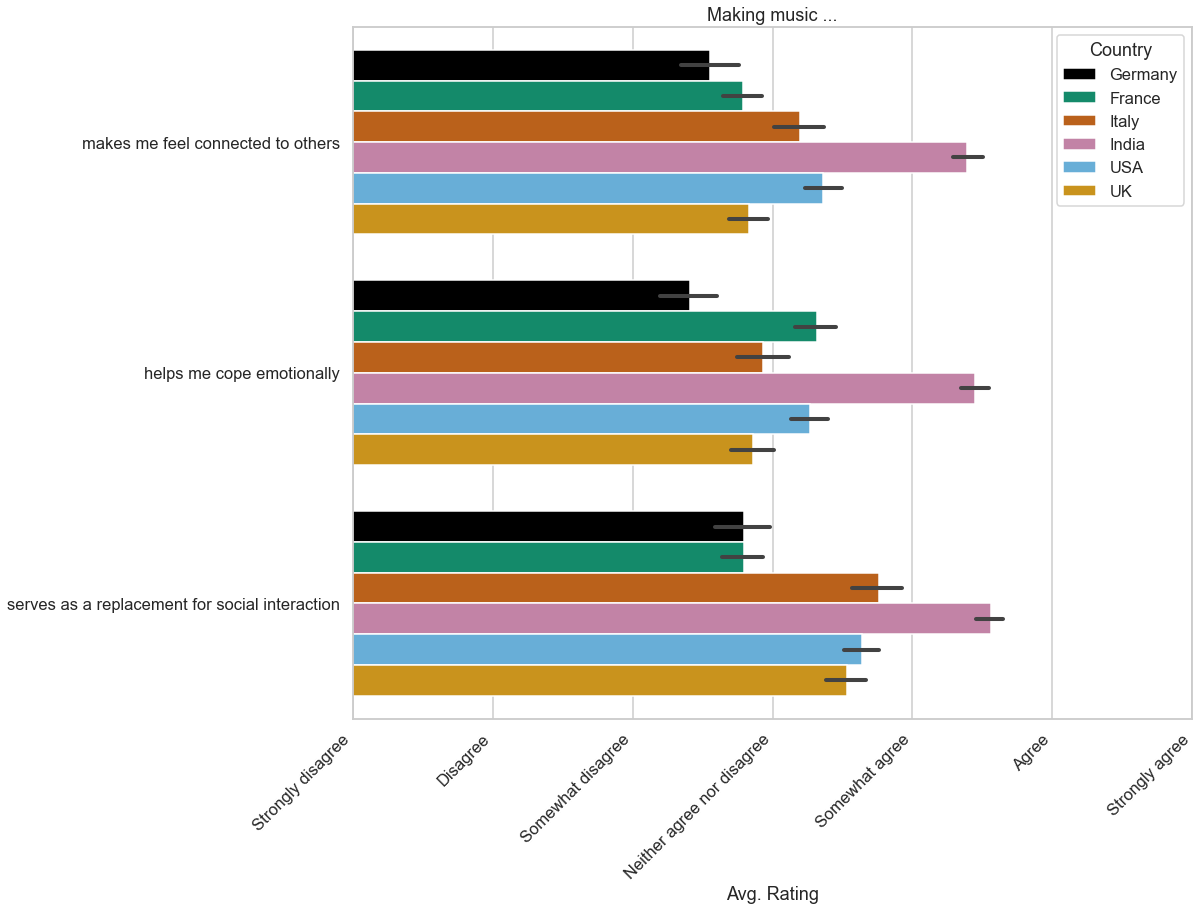

In [26]:
# plot hypothesis means by country - making
f = plt.figure(figsize=(17,13))

cols = ['Country_Country Name', 'Making Music_Hypotheses_Feel Connected to Others', 'Making Music_Hypotheses_Serve as Social Interaction', 'Making Music_Hypotheses_Helps Me Cope']
mld = data[cols]
mld = mld.dropna()
mld = mld.reset_index(drop = True) 
df2 = pd.melt(mld, id_vars='Country_Country Name', var_name="hypoth", value_name="rating")

ax = sns.barplot(x='rating', y='hypoth', hue='Country_Country Name', data=df2)

ax.set(xlabel='Avg. Rating', ylabel='',title='Making music ...');
ax.set(xlim=(1,7))
xlabs = list(local_dicts.hypotheses_scale.values())
ax.set(xticklabels=xlabs);
ylabs = ['makes me feel connected to others', 'helps me cope emotionally', 'serves as a replacement for social interaction']
ax.set(yticklabels=ylabs);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.legend(loc='best')

leg = ax.get_legend()
leg.set_title("Country")

f.tight_layout()
f.savefig('Figures/Hypotheses_X_country_meansMaking.png', dpi=300);


0.5693020178630499
1721
3023


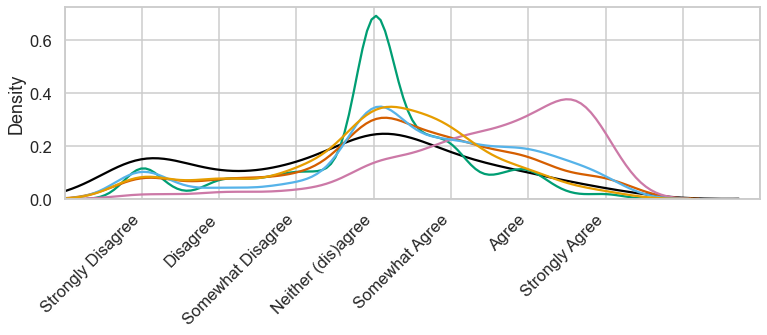

In [27]:
cols = ['Country_Country Name', 'Making Music_Hypotheses_Feel Connected to Others', 'Making Music_Hypotheses_Serve as Social Interaction', 'Making Music_Hypotheses_Helps Me Cope']
df = data[cols]
df = df.replace({99:np.nan})
df['comb_hyp_make'] = (df['Making Music_Hypotheses_Feel Connected to Others'] + df['Making Music_Hypotheses_Serve as Social Interaction'] + df['Making Music_Hypotheses_Helps Me Cope']) / 3


# Sort the dataframe by target
ger = df.loc[df['Country_Country Name'] == 'Germany']
ger = ger.dropna()
fra = df.loc[df['Country_Country Name'] == 'France']
fra = fra.dropna()
ita = df.loc[df['Country_Country Name'] == 'Italy']
ita = ita.dropna()
ind = df.loc[df['Country_Country Name'] == 'India']
ind = ind.dropna()
usa = df.loc[df['Country_Country Name'] == 'USA']
usa = usa.dropna()
uk = df.loc[df['Country_Country Name'] == 'UK']
uk = uk.dropna()

f, ax = plt.subplots(figsize=(11, 5))

sns.distplot(ger[['comb_hyp_make']], hist=False, rug=False)
sns.distplot(fra[['comb_hyp_make']], hist=False, rug=False)
sns.distplot(ita[['comb_hyp_make']], hist=False, rug=False)
sns.distplot(ind[['comb_hyp_make']], hist=False, rug=False)
sns.distplot(usa[['comb_hyp_make']], hist=False, rug=False)
ax = sns.distplot(uk[['comb_hyp_make']], hist=False, rug=False)

ax.set(ylabel='Density');
ax.set(xlim=(0,9))
xlabs = ['', 'Strongly Disagree', 'Disagree', 'Somewhat Disagree', 'Neither (dis)agree', 'Somewhat Agree', 'Agree', 'Strongly Agree', '']
ax.set(xticklabels=xlabs);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
#ax.grid(False)
f.tight_layout()
f.savefig('Figures/Hypotheses_X_country_means_combinedScore_making_KDE.png', dpi=300);


frames = [ger, fra, ita, ind, usa, uk]
nd = pd.concat(frames)
high_list = nd[nd['comb_hyp_make'] > 4]
print(high_list.shape[0] / nd.shape[0])

print(high_list.shape[0])
print(nd.shape[0])

## Rank activities in relation to coping scores
Look at activities for those who say music helps them cope vs. not
This is to get an idea of what other activities might have taken the place of music.

In [28]:
# organize data
df = data #pd.read_csv('Tables/cleaned_data_big6_andGovResp.csv')
df['comb_hyp_make'] = (df['Making Music_Hypotheses_Feel Connected to Others'] + df['Making Music_Hypotheses_Serve as Social Interaction'] + df['Making Music_Hypotheses_Helps Me Cope']) / 3
df['comb_hyp_list'] = (df['Music Listening_Hypotheses_Feel Connected to Others'] + df['Music Listening_Hypotheses_Serve as Social Interaction'] + df['Music Listening_Hypotheses_Helps Me Cope']) / 3
lisLow = df[df['comb_hyp_list'] <= 4]
lisHigh = df[df['comb_hyp_list'] > 4]
makeLow = df[df['comb_hyp_make'] <= 4]
makeHigh = df[df['comb_hyp_make'] > 4]
print(lisLow.shape)
print(lisHigh.shape)
print(makeLow.shape)
print(makeHigh.shape)

(2067, 234)
(2559, 234)
(1302, 234)
(1721, 234)


### Music Listening

In [29]:
# plot activities - listening low
# keyword = 'Activities_'
# [all_ranks_change, chgrank] = local_funcs.return_ranks(lisLow, keyword)
# [f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)

In [30]:
# keyword = 'Activities_'
# [all_ranks_change, chgrank] = local_funcs.return_ranks(lisHigh, keyword)
# [f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)

### Music making

In [31]:
# # plot activities - making low
# keyword = 'Activities_'
# [all_ranks_change, chgrank] = local_funcs.return_ranks(makeLow, keyword)
# [f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)

In [32]:
# keyword = 'Activities_'
# [all_ranks_change, chgrank] = local_funcs.return_ranks(makeHigh, keyword)
# [f, ax] = local_funcs.plot_ranks(all_ranks_change, keyword, chgrank, 0, '.png', 300)